C:\Users\HP\anaconda3\envs\tf_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\envs\tf_env\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[ 0.59486612, -0.14579653],
       [-0.62504301,  1.16294838],
       [-1.05629236, -0.32446652],
       [ 0.47287247, -1.34568786],
       [ 1.87328147, -0.0798615 ]])

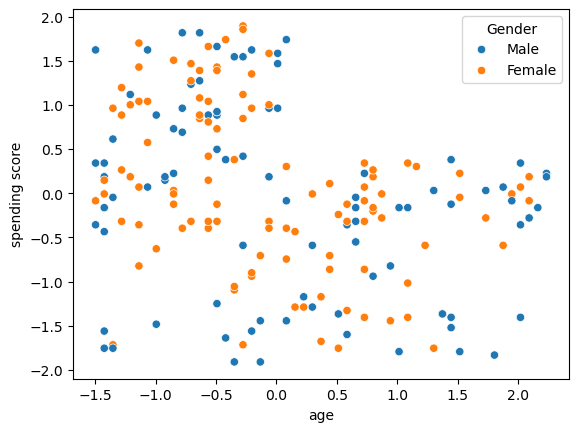

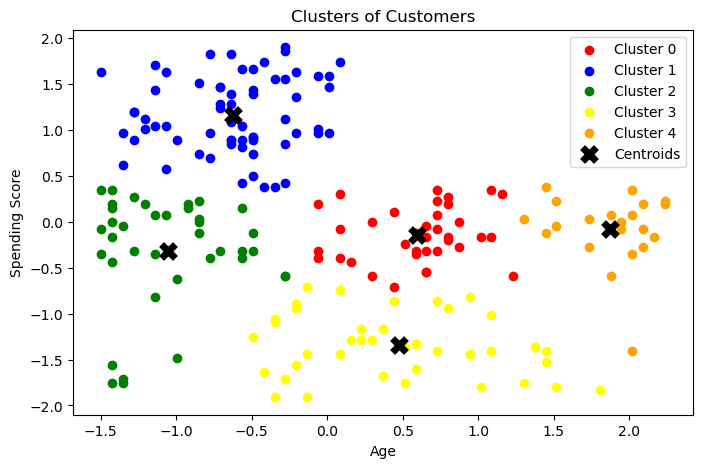

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('16-Mall_Customers.csv')

from sklearn.preprocessing import StandardScaler

x = df.iloc[:,2:]
scaler = StandardScaler()
x = scaler.fit_transform(x)

pd.DataFrame(x)

gender = df['Gender']
df = pd.DataFrame(x, columns = ['age', 'income', 'spending score'])
df['Gender'] = gender

df.to_numpy()

sns.scatterplot(data = df, x = 'age', y = 'spending score', hue = 'Gender')

columns = list(df.columns)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 42)

x = df[['age', 'spending score']].to_numpy()
kmeans.fit(x)

x

labels = kmeans.labels_
kmeans.cluster_centers_
kmeans.inertia_

clust0 = labels == 0
clust1 = labels == 1
clust2 = labels == 2
clust3 = labels == 3
clust4 = labels == 4


plt.figure(figsize=(8, 5))

plt.scatter(x[clust0, 0], x[clust0, 1], c='red', label='Cluster 0')
plt.scatter(x[clust1, 0], x[clust1, 1], c='blue', label='Cluster 1')
plt.scatter(x[clust2, 0], x[clust2, 1], c='green', label='Cluster 2')
plt.scatter(x[clust3, 0], x[clust3, 1], c='yellow', label='Cluster 3')
plt.scatter(x[clust4, 0], x[clust4, 1], c='orange', label='Cluster 4')


# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=100, c='black', label='Centroids', marker='x', linewidth=5)

plt.legend()
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')

kmeans.cluster_centers_

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


In [5]:
from sklearn.metrics import silhouette_score

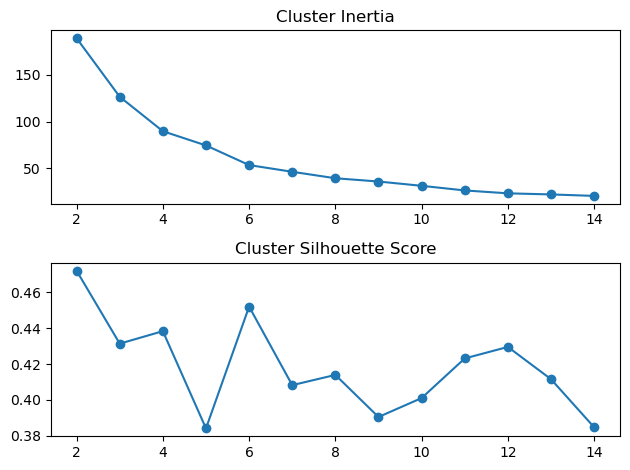

In [6]:
inertia = []
sil_score = []

max_k = 15

for k in range(2, max_k):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
    
    cluster_labels = kmeans.labels_
    s_score = silhouette_score(x, cluster_labels)
    sil_score.append(s_score)
    
#inertia, sil_score
plt.subplot(2, 1, 1)
plt.plot(np.arange(2, max_k), inertia, 'o-')
plt.title('Cluster Inertia')

plt.subplot(2, 1, 2)
plt.plot(np.arange(2, max_k), sil_score, 'o-')
plt.title('Cluster Silhouette Score')

plt.tight_layout()
plt.show()

###
## Clustering for Annual Income vs Spending Score
###

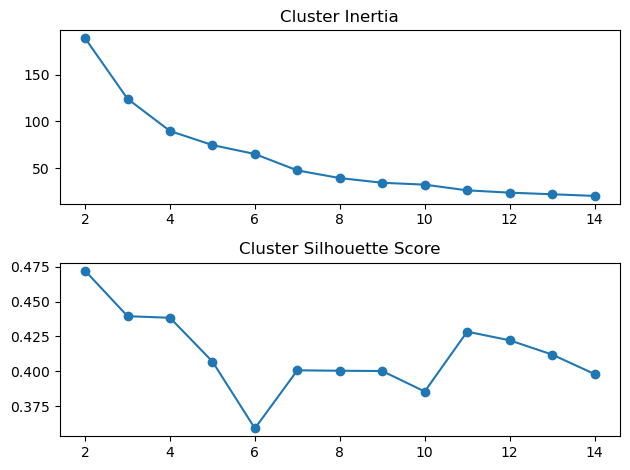

In [10]:
inertia = []
sil_score = []

max_k = 15

for k in range(2, max_k):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
    
    cluster_labels = kmeans.labels_
    s_score = silhouette_score(x, cluster_labels)
    sil_score.append(s_score)
    
#inertia, sil_score
plt.subplot(2, 1, 1)
plt.plot(np.arange(2, max_k), inertia, 'o-')
plt.title('Cluster Inertia')

plt.subplot(2, 1, 2)
plt.plot(np.arange(2, max_k), sil_score, 'o-')
plt.title('Cluster Silhouette Score')

plt.tight_layout()
plt.show()